

*   The spatial features of a 2D image are lost when it s flattened to a 1D vector input.
*   Parameter Issue -Number of parameters for the network increases if we flatten the input image as it is.




*   CNN learns to recognize basic lines and curves, then shape and blobs and then increasingly complex objects within the image.It classifies the image by combining the larger,more complex objects.







In [25]:
from tensorflow.keras.datasets import mnist

(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

print(f"The mnist database has training set of {len(X_train)} examples")
print(f"The mnist database has training set of {len(X_train)} examples")

The mnist database has training set of 60000 examples
The mnist database has training set of 60000 examples


# Visualizing the Training Images



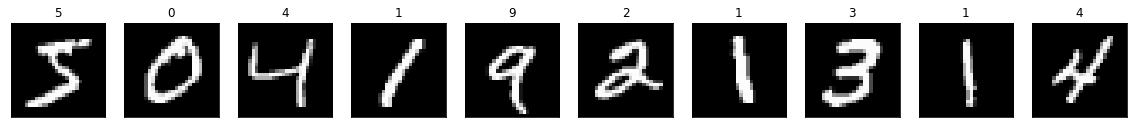

In [26]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

fig = plt.figure(figsize=(20,20))

for it in range(10):
  ax = fig.add_subplot(1,10,it+1,xticks=[],yticks=[])
  ax.imshow(X_train[it],cmap='gray')
  ax.set_title(str(Y_train[it]))



## Preprocess Input Images ; Rescale the image by dividing every pixel in every image by 255

In [27]:
# Rescale to have values within 0-1 range [0,255] --> [0,1]

X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

print(f"X_train shape : {X_train.shape}")
print(f"{X_train.shape[0]} train examples")
print(f"{X_test.shape[0]} test examples")

X_train shape : (60000, 28, 28)
60000 train examples
10000 test examples


# Preprocess the Labels

In [28]:
from keras.utils import np_utils

num_classes = 10

# Print First Ten (integer - valued) training labels
print('Integer valued labels:')
print(Y_train[:10])

#One hot encode the labels
#Convert class vectors to binary class matrices

Y_train = np_utils.to_categorical(Y_train,num_classes)
Y_test = np_utils.to_categorical(Y_test,num_classes)

#Print first ten (one-hot) training labels
print('One-ht labels')
print(Y_train[:10])

Integer valued labels:
[5 0 4 1 9 2 1 3 1 4]
One-ht labels
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


# Reshape data to fit our CNN 

In [29]:
imageRows , imageColumns = 28,28

X_train = X_train.reshape(X_train.shape[0],imageRows , imageColumns, 1)
X_test = X_test.reshape(X_test.shape[0],imageRows , imageColumns, 1)
inputShape = (imageRows,imageColumns,1)

print(f'input shape:{inputShape}')
print(f'X_train shape:{X_train.shape}')

input shape:(28, 28, 1)
X_train shape:(60000, 28, 28, 1)


# Define the model Architecture



*   Always add a ReLU activation function to the Conv2D layers in CNN.with the exception of the final layer in the netowrk , Dense Layers should also have a ReLU activation function.
*   When Constructing a network for classification, the final layer in the network should be a Dense Layer with a softmax activation function.The number of nodes in the final layer should equal to the total number of classes in the dataset.



In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D, Flatten , Dense , Dropout,GlobalAveragePooling2D

# Create a Sequential Object
modelCNN = Sequential()

# CONV1: add CONV layer with reLU activation and depth =32 kernels.
#Input shape is (28,28,1) because it is a gray scale image.
#It has 1 channel.
modelCNN.add(Conv2D(32,kernel_size = (3,3),padding = 'same',activation='relu',input_shape=(28,28,1))) # 28*28*32

#POOL_1 downsample the image to choose the best features
modelCNN.add(MaxPooling2D(pool_size=(2,2))) # 14*14*32

#CONV_2 increase the depth to 64
modelCNN.add(Conv2D(64,(3,3),padding='same',activation='relu')) # 14*14*64

#POOL_2 more downsampling
modelCNN.add(MaxPooling2D(pool_size=(2,2))) # 7*7*64

# Flatten the layer
modelCNN.add(Flatten()) # 3136

# FC_1: Fully connected to get all the details
modelCNN.add(Dense(64,activation='relu')) 

#3FC_2 : Output a softmax to squash the matrix into output probabilities for the 10 classes
modelCNN.add(Dense(10,activation='softmax'))
modelCNN.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 3136)              0         
                                                                 
 dense_8 (Dense)             (None, 64)               

In [31]:
modelCNN_2= Sequential()

# CONV1: add CONV layer with reLU activation and depth =16 kernels.
#Input shape is (28,28,1) because it is a gray scale image.
#It has 1 channel.
modelCNN_2.add(Conv2D(16,kernel_size = (3,3),padding = 'same',activation='relu',input_shape=(28,28,1))) # 28*28*16

#POOL_1 downsample the image to choose the best features
modelCNN_2.add(MaxPooling2D(pool_size=(2,2))) # 14*14*16

#CONV_2 increase the depth to 32
modelCNN_2.add(Conv2D(32,(3,3),padding='same',activation='relu')) # 14*14*32

#POOL_2 more downsampling
modelCNN_2.add(MaxPooling2D(pool_size=(2,2))) # 7*7*32

# Flatten the layer
modelCNN_2.add(Flatten()) # 1568

# FC_1: Fully connected to get all the details
modelCNN_2.add(Dense(32,activation='relu')) 

#3FC_2 : Output a softmax to squash the matrix into output probabilities for the 10 classes
modelCNN_2.add(Dense(10,activation='softmax'))
modelCNN_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 1568)              0         
                                                                 
 dense_10 (Dense)            (None, 32)               

In [32]:
modelCNN_3= Sequential()

# CONV1: add CONV layer with reLU activation and depth =16 kernels.
#Input shape is (28,28,1) because it is a gray scale image.
#It has 1 channel.
modelCNN_3.add(Conv2D(128,kernel_size = (3,3),padding = 'same',activation='relu',input_shape=(28,28,1))) # 28*28*128

#POOL_1 downsample the image to choose the best features
modelCNN_3.add(MaxPooling2D(pool_size=(2,2))) # 14*14*128

#CONV_2 increase the depth to 32
modelCNN_3.add(Conv2D(256,(3,3),padding='same',activation='relu')) # 14*14*256

#POOL_2 more downsampling
modelCNN_3.add(MaxPooling2D(pool_size=(2,2))) # 7*7*256

# Flatten the layer
modelCNN_3.add(Flatten()) # 12544

# FC_1: Fully connected to get all the details
modelCNN_3.add(Dense(32,activation='relu')) 

#3FC_2 : Output a softmax to squash the matrix into output probabilities for the 10 classes
modelCNN_3.add(Dense(10,activation='softmax'))
modelCNN_3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 28, 28, 128)       1280      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 14, 14, 256)       295168    
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 7, 7, 256)        0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 12544)             0         
                                                                 
 dense_12 (Dense)            (None, 32)               

# Compile the Model

In [33]:
modelCNN.compile(loss ='categorical_crossentropy',optimizer = 'rmsprop',metrics = ['accuracy'])
modelCNN_2.compile(loss ='categorical_crossentropy',optimizer = 'rmsprop',metrics = ['accuracy'])
modelCNN_3.compile(loss ='categorical_crossentropy',optimizer = 'rmsprop',metrics = ['accuracy'])

# Train the Model

In [37]:
from tensorflow.keras.callbacks import ModelCheckpoint

#train the model
checkpointer1 = ModelCheckpoint(filepath='model.weights_CNN.best.hdf5',verbose=1,save_best_only=True)

modelFit1 = modelCNN.fit(X_train,Y_train, batch_size = 64 , epochs = 10, validation_data = (X_test,Y_test),callbacks=[checkpointer1],verbose=2,shuffle=True)

checkpointer2 = ModelCheckpoint(filepath='model.weights_CNN_2.best.hdf5',verbose=1,save_best_only=True)
modelFit2 = modelCNN_2.fit(X_train,Y_train, batch_size = 64 , epochs = 10, validation_data = (X_test,Y_test),callbacks=[checkpointer2],verbose=2,shuffle=True)

checkpointer3 = ModelCheckpoint(filepath='model.weights_CNN_3.best.hdf5',verbose=1,save_best_only=True)
modelFit2 = modelCNN_3.fit(X_train,Y_train, batch_size = 64 , epochs = 10, validation_data = (X_test,Y_test),callbacks=[checkpointer3],verbose=2,shuffle=True)

Epoch 1/10

Epoch 1: val_loss improved from inf to 0.03772, saving model to model.weights_CNN.best.hdf5
938/938 - 4s - loss: 0.0200 - accuracy: 0.9941 - val_loss: 0.0377 - val_accuracy: 0.9888 - 4s/epoch - 4ms/step
Epoch 2/10

Epoch 2: val_loss improved from 0.03772 to 0.03536, saving model to model.weights_CNN.best.hdf5
938/938 - 4s - loss: 0.0160 - accuracy: 0.9950 - val_loss: 0.0354 - val_accuracy: 0.9902 - 4s/epoch - 4ms/step
Epoch 3/10

Epoch 3: val_loss improved from 0.03536 to 0.03465, saving model to model.weights_CNN.best.hdf5
938/938 - 4s - loss: 0.0124 - accuracy: 0.9961 - val_loss: 0.0347 - val_accuracy: 0.9902 - 4s/epoch - 4ms/step
Epoch 4/10

Epoch 4: val_loss improved from 0.03465 to 0.02929, saving model to model.weights_CNN.best.hdf5
938/938 - 4s - loss: 0.0105 - accuracy: 0.9968 - val_loss: 0.0293 - val_accuracy: 0.9919 - 4s/epoch - 4ms/step
Epoch 5/10

Epoch 5: val_loss improved from 0.02929 to 0.02899, saving model to model.weights_CNN.best.hdf5
938/938 - 4s - loss:

# Load the Model with the Best Classification Accuracy on the Validation Set

In [38]:
# Load the weights that yielded the best validation accuracy
modelCNN.load_weights('model.weights_CNN.best.hdf5')
modelCNN_2.load_weights('model.weights_CNN_2.best.hdf5')
modelCNN_3.load_weights('model.weights_CNN_3.best.hdf5')

# Calculate the classification Accuracy on the Test Set

In [39]:
# evaluate test Accuracy
score = modelCNN.evaluate(X_test,Y_test,verbose=0)
accuracy = 100*score[1]

# Print Test Accuracy
print('Test Accuracy modelCNN: %.4f%%' % accuracy)

score = modelCNN_2.evaluate(X_test,Y_test,verbose=0)
accuracy = 100*score[1]
# Print Test Accuracy
print('Test Accuracy modelCNN2: %.4f%%' % accuracy)

score = modelCNN_3.evaluate(X_test,Y_test,verbose=0)
accuracy = 100*score[1]
# Print Test Accuracy
print('Test Accuracy modelCNN3: %.4f%%' % accuracy)

Test Accuracy modelCNN: 99.2800%
Test Accuracy modelCNN2: 99.0400%
Test Accuracy modelCNN3: 99.2300%
